# Linear Regression

LR can answer following questions:
Is there a relationship between X and Y?

How strong is the relationship?

Which factors contribute to Y?

How accurately can we estimate the effect of each X on Y?

How accurately can we predict future Y?

Is the relationship linear?

Is there synergy among X?

LR formula: 
Y ≈ β 0 + β 1 X + epsilon.

Mathematically, LR assumes that there is a linear relationship between X and Y Together, β 0 and β 1 are known as the model coefficients or parameters. Once we have used our training data to produce estimates β̂ 0 and β̂ 1 for the model coefficients, we can predict future sales on the basis of a particular value of TV advertising by computing ŷ = β̂ 0 + β̂ 1 x where ŷ indicates a prediction of Y on the basis of X = x.


In [2]:
# activate R magic
import rpy2
%load_ext rpy2.ipython

In [ ]:
import pandas as pd

In [33]:
%%R
suppressWarnings(suppressMessages(library(MASS)))
#install.packages("ISLR", repos = getOption('repos'))
suppressWarnings(suppressMessages(library(ISLR)))
#install.packages("ggplot2", repos = getOption('repos'))
suppressWarnings(suppressMessages(library(ggplot2))) #nice plots
#install.packages("GGally", repos = getOption('repos'))
suppressWarnings(suppressMessages(library(GGally))) #even nicer plots 
suppressWarnings(suppressMessages(library(dplyr) ))#data munging
suppressWarnings(suppressMessages(library(car))) #contains VIF function
suppressWarnings(suppressMessages(library(caret))) #ML package

In [14]:
%%R
#look at the data
fix(Boston)

In [5]:
%%R
#https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
attach(Boston) #so we can work with varaibles 

In [6]:
%%R
print(summary(Boston))
print(dim(Boston))

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,1] [--------------------------------------------------]  1% est: 0s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,2] [>-------------------------------------------------]  1% est: 8s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,3] [>-------------------------------------------------]  2% est: 9s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,4] [>-------------------------------------------------]  2

/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [3,9] [========>-----------------------------------------] 19% est: 9s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [3,10] [=========>---------------------------------------] 19% est: 9s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [3,11] [=========>---------------------------------------] 20% est: 9s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [3,12] [=========>---------------------------------------] 20% est: 8s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntim

/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [6,7] [===================>------------------------------] 39% est: 7s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [6,8] [===================>------------------------------] 40% est: 7s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [6,9] [===================>------------------------------] 40% est: 7s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [6,10] [===================>-----------------------------] 41% est: 7s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntim

/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [9,5] [=============================>--------------------] 60% est: 5s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [9,6] [=============================>--------------------] 60% est: 5s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [9,7] [=============================>--------------------] 61% est: 5s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [9,8] [==============================>-------------------] 61% est: 4s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntim

/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [12,3] [======================================>----------] 80% est: 2s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [12,4] [=======================================>---------] 81% est: 2s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [12,5] [=======================================>---------] 81% est: 2s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [12,6] [=======================================>---------] 82% est: 2s 
  warnings.warn(x, RRuntimeWarning)
/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntim

/home/elena/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [14,14] [================================================]100% est: 0s 
  warnings.warn(x, RRuntimeWarning)
                                                                              
  warnings.warn(x, RRuntimeWarning)


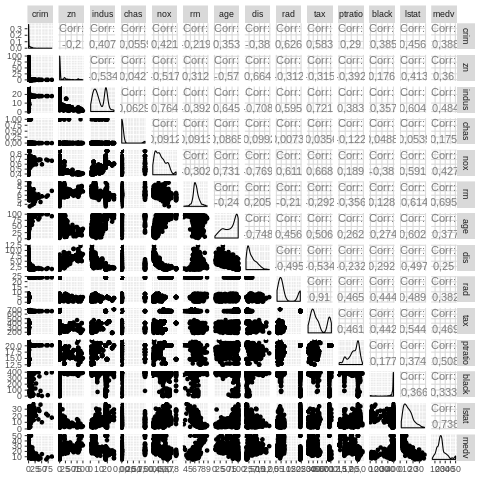

In [27]:
%%R
#pairs(Boston)
ggpairs(Boston) 

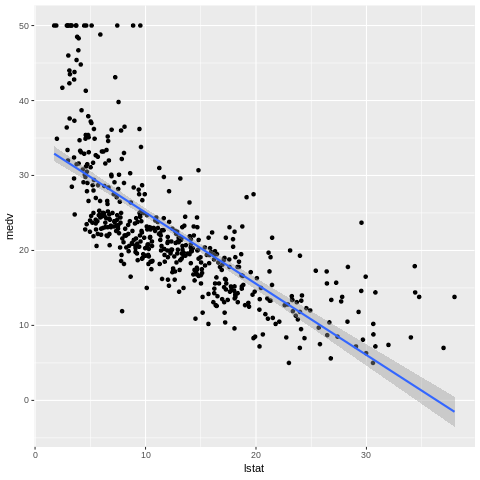

In [64]:
%%R
#Hastei is modelling medv (Median value of owner-occupied homes in $1000's) vs 
#LSTAT - % lower status of the population, 
#so we will look at the relationship
ggplot(Boston, aes(lstat, medv))+geom_point()+geom_smooth(method="lm")

We can see that the relationship is not totally linear

### Linear modeling

Our goal is to obtain coefficient estimates β̂ 0 and β̂ 1 such that the linear model fits the available data well—that is, so that y i ≈ β̂ 0 + β̂ 1 x i for i =1, . . . , n. In other words, we want to find an intercept β̂ 0 and a slope β̂ 1 such that the resulting line is as close as possible to the n = 506 data points

In [12]:
%%R
lm.fit = lm(medv~lstat)

In [13]:
%%R
lm.fit


Call:
lm(formula = medv ~ lstat)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  



In [20]:
%%R
summary(lm.fit)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15,168  -3,990  -1,318   2,034  24,500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34,55384    0,56263   61,41   <2e-16 ***
lstat       -0,95005    0,03873  -24,53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 6,216 on 504 degrees of freedom
Multiple R-squared:  0,5441,	Adjusted R-squared:  0,5432 
F-statistic: 601,6 on 1 and 504 DF,  p-value: < 2,2e-16



The quality of the prediction can be estimated vis RSS
We define the residual sum of squares (RSS) as
RSS =e 21+e 22+ ··· +e 2 n ,
or equivalently as
RSS = (y 1 − β̂ 0 − β̂ 1 x 1 ) 2 + (y 2 − β̂ 0 − β̂ 1 x 2 ) 2 + . . .+ (y n − β̂ 0 − β̂ 1 x n ) 2 

Interpretation: for each % lower status of the population, the median value of owner-occupied homes ( in $1000) decreases by 950

R-squared refers to the correlation between the predictor and the response. It describes the amount of variation explained by the least squares line. R2=1-variability(residuals)/variability(outcome). The adjusted R2 is useful in multiple LR with R2(adj)=1-variability(residuals)/variability(outcome) x (n-1)/(n-k-1) with n=number of samples, k=number of variables

t Value reflects how far away the estimated b-value is from H0 ((estimate-0)/StdError)=t. The p value results from looking at probability tables of the t-distribution.

### Assessing the Accuracy of the Coefficient Estimates

As we obtain each coefficient estimate from a particular population, we might be over- or underestimating the "population" coefficient. Hence, we want to know how far off our estimations are. In general, we answer this question by computing the standard error:

Variance(x)= SE(x)2=σ2/n

where σ is the standard deviation of each of the realizations y i of Y

In [21]:
%%R
#In order to obtain a confidence interval for the coefficient estimates, we can use the confint() command.
confint(lm.fit)

                2,5 %     97,5 %
(Intercept) 33,448457 35,6592247
lstat       -1,026148 -0,8739505


In [22]:
%%R
#what is in the lm.fit object?
names(lm.fit)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        


In [27]:
%%R
print(predict(lm.fit , data.frame(lstat = c(5 ,10 ,15) ),interval ="confidence"))
print(predict(lm.fit , data.frame(lstat = c(5 ,10 ,15) ),interval ="prediction"))

       fit      lwr      upr
1 29,80359 29,00741 30,59978
2 25,05335 24,47413 25,63256
3 20,30310 19,73159 20,87461
       fit       lwr      upr
1 29,80359 17,565675 42,04151
2 25,05335 12,827626 37,27907
3 20,30310  8,077742 32,52846


For instance, the 95 % confidence interval associated with a lstat value of
10 is (24.47, 25.63), and the 95 % prediction interval is (12.828, 37.28). As
expected, the confidence and prediction intervals are centered around the
same point (a predicted value of 25.05 for medv when lstat equals 10), but
the latter are substantially wider.

In [42]:
%%R
#fit lm with caret package:
#https://topepo.github.io/caret/train-models-by-tag.html#linear-regression
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)
set.seed(825)
lm_caret <- train(medv~lstat, data = Boston, 
                 method = "lm", 
                 trControl = fitControl,
                 verbose = FALSE)
lm_caret

Linear Regression 

506 samples
  1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 456, 456, 455, 455, 456, 456, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6,189432  0,5585423  4,524682

Tuning parameter 'intercept' was held constant at a value of TRUE


### Look at diagnostic plots:

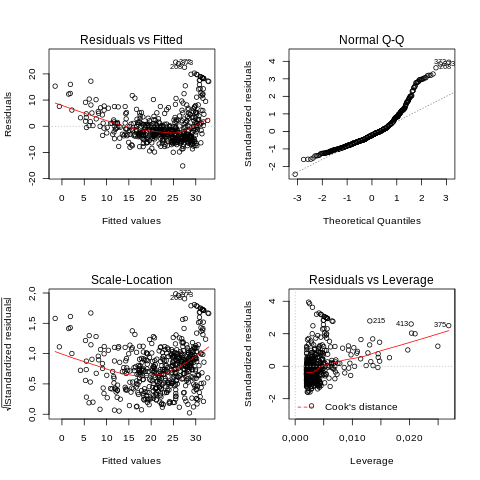

In [28]:
%%R
par(mfrow = c(2 ,2) )
plot(lm.fit )

Interpreting the residual plot: the plot should not have a pattern. The curvature observed here tells us, that a linear model was not an optimal fir and more advanced methods should have been selected.

Quantile-Quantile plot: tells whether the data is normally distributed (if data is distributed on a line) and which distribution the data fits best (normal or not)

Scale-Location: tells you whether your data is homoscedastic (line is flat) or heteroscedastic (line slopes). In order to perform LR, you should not have heteroscedastic data, but homoscedastic (comparable variance).

The Cook plot helps to identify outliers with high leverage such like here: (look for points that are behind the Cook's distance)


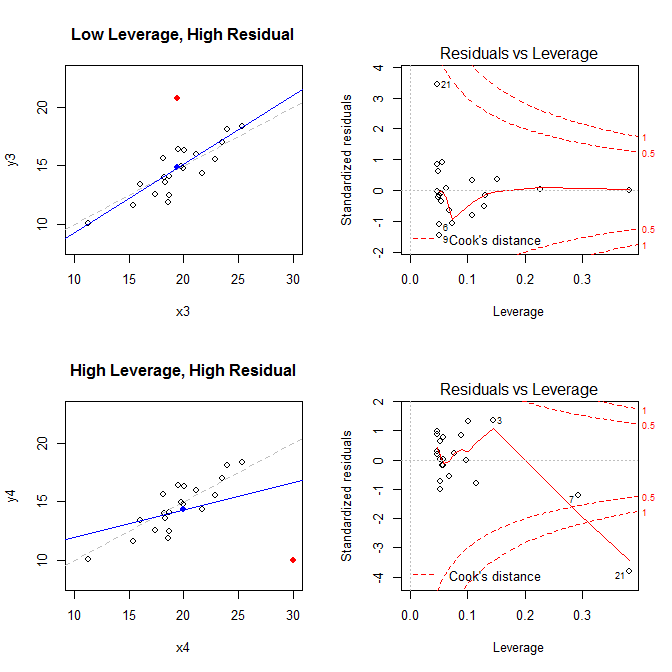

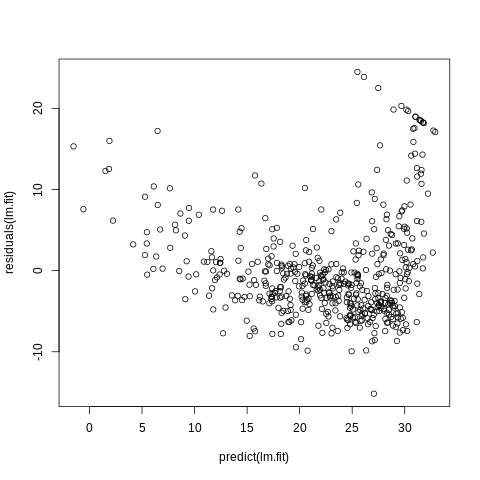

In [29]:
%%R
plot(predict(lm.fit) , residuals(lm.fit))

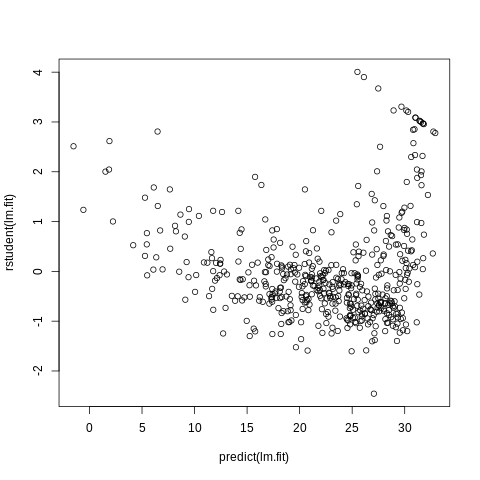

In [30]:
%%R
plot(predict(lm.fit) , rstudent(lm.fit) )

375 
375 


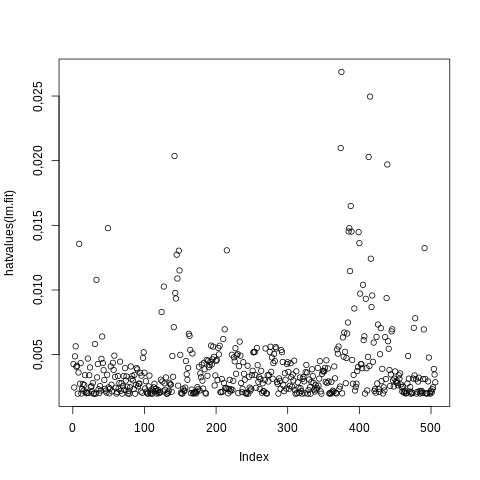

In [31]:
%%R
plot(hatvalues(lm.fit))
which.max(hatvalues(lm.fit ) ) # which observation has the largest leverage statistic.

## Multiple linear regression

In [33]:
%%R 
lm.fit_multi = lm(medv~lstat+age , data = Boston )
summary(lm.fit_multi)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15,981  -3,978  -1,283   1,968  23,158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33,22276    0,73085  45,458  < 2e-16 ***
lstat       -1,03207    0,04819 -21,416  < 2e-16 ***
age          0,03454    0,01223   2,826  0,00491 ** 
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 6,173 on 503 degrees of freedom
Multiple R-squared:  0,5513,	Adjusted R-squared:  0,5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2,2e-16



In [21]:
%%R
#calculate LR based on all features:
lm.fit_all = lm(medv~., data = Boston )
summary(lm.fit_all)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15,595  -2,730  -0,518   1,777  26,199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3,646e+01  5,103e+00   7,144 3,28e-12 ***
crim        -1,080e-01  3,286e-02  -3,287 0,001087 ** 
zn           4,642e-02  1,373e-02   3,382 0,000778 ***
indus        2,056e-02  6,150e-02   0,334 0,738288    
chas         2,687e+00  8,616e-01   3,118 0,001925 ** 
nox         -1,777e+01  3,820e+00  -4,651 4,25e-06 ***
rm           3,810e+00  4,179e-01   9,116  < 2e-16 ***
age          6,922e-04  1,321e-02   0,052 0,958229    
dis         -1,476e+00  1,995e-01  -7,398 6,01e-13 ***
rad          3,060e-01  6,635e-02   4,613 5,07e-06 ***
tax         -1,233e-02  3,760e-03  -3,280 0,001112 ** 
ptratio     -9,527e-01  1,308e-01  -7,283 1,31e-12 ***
black        9,312e-03  2,686e-03   3,467 0,000573 ***
lstat       -5,248e-01  5,072e-02 -10,347  < 2e-16 ***
---
Signif. codes:  0

Collinearity: 

The VIF (variance inflation factor) is the ratio of the variance of ˆβj when fitting the full model divided by the
variance of ˆβj if fit on its own. The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. 

Correlation among predictors is problematic as 

1) the variance of all predictors tends to increase

2) the interpretation is problematic: when factor A changes, the correlated factor B changes as well, so which causes the response?

In [43]:
%%R
vif(lm.fit_all)

    crim       zn    indus     chas      nox       rm      age      dis 
1,792192 2,298758 3,991596 1,073995 4,393720 1,933744 3,100826 3,955945 
     rad      tax  ptratio    black    lstat 
7,484496 9,008554 1,799084 1,348521 2,941491 


There are several remedial measure to deal with the problem of multicollinearity such as Prinicipal Component Regression, Ridge Regression, Stepwise Regression, or simply removing one of the correlating variables, if both reflect a comparable factor.

In [32]:
%%R
cor(Boston)

               crim          zn       indus         chas         nox
crim     1,00000000 -0,20046922  0,40658341 -0,055891582  0,42097171
zn      -0,20046922  1,00000000 -0,53382819 -0,042696719 -0,51660371
indus    0,40658341 -0,53382819  1,00000000  0,062938027  0,76365145
chas    -0,05589158 -0,04269672  0,06293803  1,000000000  0,09120281
nox      0,42097171 -0,51660371  0,76365145  0,091202807  1,00000000
rm      -0,21924670  0,31199059 -0,39167585  0,091251225 -0,30218819
age      0,35273425 -0,56953734  0,64477851  0,086517774  0,73147010
dis     -0,37967009  0,66440822 -0,70802699 -0,099175780 -0,76923011
rad      0,62550515 -0,31194783  0,59512927 -0,007368241  0,61144056
tax      0,58276431 -0,31456332  0,72076018 -0,035586518  0,66802320
ptratio  0,28994558 -0,39167855  0,38324756 -0,121515174  0,18893268
black   -0,38506394  0,17552032 -0,35697654  0,048788485 -0,38005064
lstat    0,45562148 -0,41299457  0,60379972 -0,053929298  0,59087892
medv    -0,38830461  0,36044534 -0

## Model selection

There are basically 2 stepwise model selection strategies: backward elimination and forward selection.
In backward elimination, we identify predictors with p_values >0.05 and eliminate them sequentially. We could also focus on R2 and remove (or add) variables to increase R2. 
When the sole goal is to improve prediction accuracy, use R2. When you want to understand the data and to arrive at a simple model, use p.

Age appears to have a high p_value, so we want to exclude it from the model: 

In [44]:
%%R
lm.fit1 = lm(medv~. -age, data = Boston )
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15,6054  -2,7313  -0,5188   1,7601  26,2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36,436927   5,080119   7,172 2,72e-12 ***
crim         -0,108006   0,032832  -3,290 0,001075 ** 
zn            0,046334   0,013613   3,404 0,000719 ***
indus         0,020562   0,061433   0,335 0,737989    
chas          2,689026   0,859598   3,128 0,001863 ** 
nox         -17,713540   3,679308  -4,814 1,97e-06 ***
rm            3,814394   0,408480   9,338  < 2e-16 ***
dis          -1,478612   0,190611  -7,757 5,03e-14 ***
rad           0,305786   0,066089   4,627 4,75e-06 ***
tax          -0,012329   0,003755  -3,283 0,001099 ** 
ptratio      -0,952211   0,130294  -7,308 1,10e-12 ***
black         0,009321   0,002678   3,481 0,000544 ***
lstat        -0,523852   0,047625 -10,999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1

We should now also exclude indus, to keep only influential predictors.

In [10]:
%%R
lm.fit1 = lm(medv~. -age-indus, data = Boston )
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age - indus, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.736 on 494 d

As it is very tedious to run by hand, there is an automated way for it:

In [24]:
%%R
# Stepwise regression model
step.model <- stepAIC(lm.fit_all , direction = "both", trace = FALSE) 
#direction can take the following values: 
#i) “both” (for stepwise regression, both forward and backward selection); 
#“backward” (for backward selection) and “forward” (for forward selection)
summary(step.model)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15,5984  -2,7386  -0,5046   1,7273  26,2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36,341145   5,067492   7,171 2,73e-12 ***
crim         -0,108413   0,032779  -3,307 0,001010 ** 
zn            0,045845   0,013523   3,390 0,000754 ***
chas          2,718716   0,854240   3,183 0,001551 ** 
nox         -17,376023   3,535243  -4,915 1,21e-06 ***
rm            3,801579   0,406316   9,356  < 2e-16 ***
dis          -1,492711   0,185731  -8,037 6,84e-15 ***
rad           0,299608   0,063402   4,726 3,00e-06 ***
tax          -0,011778   0,003372  -3,493 0,000521 ***
ptratio      -0,946525   0,129066  -7,334 9,24e-13 ***
black         0,009291   0,002674   3,475 0,000557 ***
lstat        -0,522553   0,047424 -11,019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*

## Calculate interactions

In [45]:
%%R
summary(lm(medv~lstat*age , data = Boston ) )


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15,806  -4,045  -1,333   2,085  27,552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36,0885359  1,4698355  24,553  < 2e-16 ***
lstat       -1,3921168  0,1674555  -8,313 8,78e-16 ***
age         -0,0007209  0,0198792  -0,036   0,9711    
lstat:age    0,0041560  0,0018518   2,244   0,0252 *  
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 6,149 on 502 degrees of freedom
Multiple R-squared:  0,5557,	Adjusted R-squared:  0,5531 
F-statistic: 209,3 on 3 and 502 DF,  p-value: < 2,2e-16



## Non-linear Transformations of the Predictors

In [50]:
%%R
lm.fit2 = lm(medv~lstat+ I(lstat^2), data = Boston)
summary(lm.fit2 )


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15,2834  -3,8313  -0,5295   2,3095  25,4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42,862007   0,872084   49,15   <2e-16 ***
lstat       -2,332821   0,123803  -18,84   <2e-16 ***
I(lstat^2)   0,043547   0,003745   11,63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 5,524 on 503 degrees of freedom
Multiple R-squared:  0,6407,	Adjusted R-squared:  0,6393 
F-statistic: 448,5 on 2 and 503 DF,  p-value: < 2,2e-16



The near-zero p-value associated with the quadratic term suggests that
it leads to an improved model. We use the anova() function to further
quantify the extent to which the quadratic fit is superior to the linear fit.

In [51]:
%%R
anova(lm.fit , lm.fit2 )

Analysis of Variance Table

Model 1: medv ~ lstat
Model 2: medv ~ lstat + I(lstat^2)
  Res.Df   RSS Df Sum of Sq     F    Pr(>F)    
1    504 19472                                 
2    503 15347  1    4125,1 135,2 < 2,2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1


The anova() function performs a hypothesis test comparing the two models. The null hypothesis is that the two models
fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors lstat and lstat 2 is far superior to the model that only contains the predictor lstat . This is not surprising, since earlier we saw evidence for non-linearity in the relationship between medv and lstat .

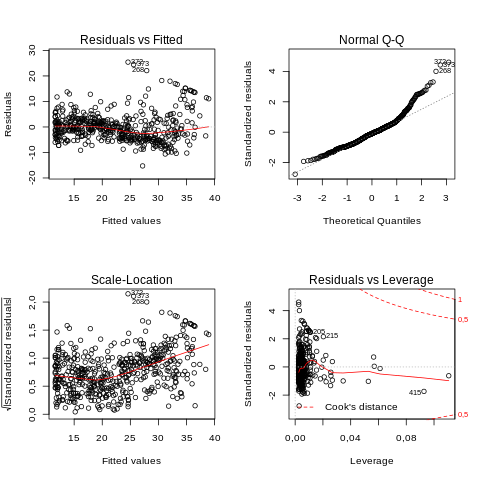

In [52]:
%%R
par(mfrow = c (2 ,2) )
plot(lm.fit2 )

In [55]:
%%R
#polynomial fit:
lm.fit5 = lm(medv~poly(lstat ,7) )
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 7))

Residuals:
     Min       1Q   Median       3Q      Max 
-14,3746  -3,1382  -0,7072   2,0646  26,9642 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22,5328     0,2319  97,168  < 2e-16 ***
poly(lstat, 7)1 -152,4595     5,2164 -29,227  < 2e-16 ***
poly(lstat, 7)2   64,2272     5,2164  12,313  < 2e-16 ***
poly(lstat, 7)3  -27,0511     5,2164  -5,186 3,13e-07 ***
poly(lstat, 7)4   25,4517     5,2164   4,879 1,44e-06 ***
poly(lstat, 7)5  -19,2524     5,2164  -3,691 0,000248 ***
poly(lstat, 7)6    6,5088     5,2164   1,248 0,212708    
poly(lstat, 7)7    1,9416     5,2164   0,372 0,709888    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 5,216 on 498 degrees of freedom
Multiple R-squared:  0,6828,	Adjusted R-squared:  0,6783 
F-statistic: 153,1 on 7 and 498 DF,  p-value: < 2,2e-16



In [56]:
%%R
#or logs
summary(lm(medv~log(rm) , data = Boston ) )


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19,487  -2,875  -0,104   2,837  39,816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76,488      5,028  -15,21   <2e-16 ***
log(rm)       54,055      2,739   19,73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 6,915 on 504 degrees of freedom
Multiple R-squared:  0,4358,	Adjusted R-squared:  0,4347 
F-statistic: 389,3 on 1 and 504 DF,  p-value: < 2,2e-16



## Qualitative predictors

In [57]:
%%R
fix(Carseats)
attach(Carseats)
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0,000   Min.   : 77   Min.   : 21,00   Min.   : 0,000  
 1st Qu.: 5,390   1st Qu.:115   1st Qu.: 42,75   1st Qu.: 0,000  
 Median : 7,490   Median :125   Median : 69,00   Median : 5,000  
 Mean   : 7,496   Mean   :125   Mean   : 68,66   Mean   : 6,635  
 3rd Qu.: 9,320   3rd Qu.:135   3rd Qu.: 91,00   3rd Qu.:12,000  
 Max.   :16,270   Max.   :175   Max.   :120,00   Max.   :29,000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10,0   Min.   : 24,0   Bad   : 96   Min.   :25,00   Min.   :10,0  
 1st Qu.:139,0   1st Qu.:100,0   Good  : 85   1st Qu.:39,75   1st Qu.:12,0  
 Median :272,0   Median :117,0   Medium:219   Median :54,50   Median :14,0  
 Mean   :264,8   Mean   :115,8                Mean   :53,32   Mean   :13,9  
 3rd Qu.:398,5   3rd Qu.:131,0                3rd Qu.:66,00   3rd Qu.:16,0  
 Max.   :509,0   Max.   :191,0                Max.   :80,00   Max.   :18,0  

In [58]:
%%R
lm.fit_q = lm( Sales~.+ Income:Advertising + Price:Age , data = Carseats )
summary(lm.fit_q )


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2,9208 -0,7503  0,0177  0,6754  3,3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6,5755654  1,0087470   6,519 2,22e-10 ***
CompPrice           0,0929371  0,0041183  22,567  < 2e-16 ***
Income              0,0108940  0,0026044   4,183 3,57e-05 ***
Advertising         0,0702462  0,0226091   3,107 0,002030 ** 
Population          0,0001592  0,0003679   0,433 0,665330    
Price              -0,1008064  0,0074399 -13,549  < 2e-16 ***
ShelveLocGood       4,8486762  0,1528378  31,724  < 2e-16 ***
ShelveLocMedium     1,9532620  0,1257682  15,531  < 2e-16 ***
Age                -0,0579466  0,0159506  -3,633 0,000318 ***
Education          -0,0208525  0,0196131  -1,063 0,288361    
UrbanYes            0,1401597  0,1124019   1,247 0,213171    
USYes              -0,1575571  0,1489234  -1,058 0,290729    
Inco

In [59]:
%%R
contrasts(ShelveLoc)

       Good Medium
Bad       0      0
Good      1      0
Medium    0      1


R has created a ShelveLocGood dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a ShelveLocMedium dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables

## When not to apply LR:

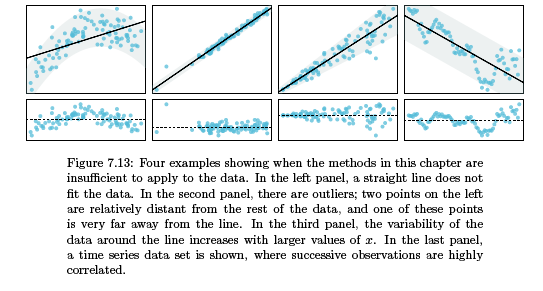

1) the data should show a linear trend
2) the residues should be ~normal
3) variability remains constant
4) data is independent (not like in time series)

https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/course/